In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
# pip install urllib3==1.25.8
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
pd.set_option('display.max_rows', 5)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
pd.set_option('display.expand_frame_repr', True)

In [10]:
# download data

#########################################
# according to 'Top 10 Holdings (27.15% of Total Assets) of SPY'
data = yf.download("SPY AAPL MSFT AMZN GOOGL GOOG BRK-B JPM JNJ",start='2000-01-01',end='2021-05-01',interval='1d')
#########################################
# I got top 100 weighted SS stocks from CSI300 index in below list
#data = yf.download("3188.HK 601318.SS 600519.SS 600036.SS 601166.SS 600016.SS 600887.SS 601328.SS 601288.SS 600276.SS 600030.SS 600000.SS 601398.SS 601668.SS 600104.SS 601601.SS 600900.SS 601169.SS 600048.SS 600837.SS 601988.SS 600019.SS 601766.SS 600028.SS 600518.SS 600585.SS 601211.SS 601818.SS 600015.SS 600703.SS 601688.SS 600690.SS 600050.SS 601888.SS 601939.SS 600919.SS 600309.SS 601857.SS 601989.SS 601006.SS 600009.SS 601012.SS 601186.SS 601899.SS 600196.SS 601009.SS 601628.SS 601088.SS 601390.SS 600999.SS 600340.SS 600741.SS 601336.SS 600221.SS 600958.SS 601933.SS 600029.SS 600031.SS 600660.SS 600795.SS 603799.SS 600089.SS 601155.SS 601985.SS 601225.SS 601377.SS 601600.SS 601669.SS 600010.SS 600066.SS 600535.SS 600570.SS 600886.SS 600011.SS 600111.SS 600115.SS 600271.SS 600406.SS 600588.SS 601607.SS 600606.SS 600383.SS 600485.SS 600522.SS 601901.SS 600352.SS 600436.SS 600893.SS 600068.SS 600705.SS 601111.SS 601788.SS 600023.SS 600739.SS 601919.SS 603993.SS 600018.SS 600177.SS 600482.SS 600547.SS 600637.SS",start='2000-01-01',end='2021-05-01',interval='1d')
#data.rename(columns={'3188.HK':'SPY'},inplace=True)
##########################################

data.dropna(how='any',axis=0,inplace=True)
data.head()

[*********************100%***********************]  9 of 9 completed


Adj Close                                                         \
                AAPL       AMZN      BRK-B       GOOG      GOOGL        JNJ   
Date                                                                          
2004-08-19  0.471565  38.630001  57.619999  49.982655  50.220219  35.539684   
2004-08-20  0.472946  39.509998  57.880001  53.952770  54.209209  35.702423   
2004-08-23  0.477246  39.450001  57.320000  54.495735  54.754753  35.708675   
2004-08-24  0.490606  39.049999  56.599998  52.239197  52.487488  35.783798   
2004-08-25  0.507497  40.299999  57.439999  52.802086  53.053055  36.090492   

                                                Close  ...        Open  \
                  JPM       MSFT        SPY      AAPL  ...         SPY   
Date                                                   ...               
2004-08-19  24.194950  17.377619  78.531418  0.548393  ...  109.809998   
2004-08-20  24.608812  17.428888  79.082588  0.550000  ...  109.610001   
2004-08-23  24.545139  17.506001  78.882133  0.555000  ...  110.550003   
2004-08-24  24.570606  17.506001  78.989525  0.570536  ...  110.639999   
2004-08-25  25.111797  17.705225  79.526390  0.590179  ...  110.330002   

               Volume                                                     \
                 AAPL      AMZN   BRK-B        GOOG       GOOGL      JNJ   
Date                                                                       
2004-08-19  388920000  12696100  250000  44871361.0  44659096.0  4444400   
2004-08-20  316780800   6790800  155000  22942874.0  22834343.0  3809300   
2004-08-23  254660000   5532600  600000  18342897.0  18256126.0  4667300   
2004-08-24  374136000   7640400  630000  15319808.0  15247337.0  4028100   
2004-08-25  505618400   7254800  520000   9232276.0   9188602.0  4701100   

                                          
                 JPM      MSFT       SPY  
Date                                      
2004-08-19   7859600  46293000  39881600  
2004-08-20   9293600  46494800  44870900  
2004-08-23   8000900  39572200  33745100  
2004-08-24   6038500  40835300  30453100  
2004-08-25  11953600  53512700  38551400  

[5 rows x 54 columns]

In [11]:
# compute return

df = data['Adj Close']

for i in df.columns:
    if 'return' not in df:
        df['return_'+i] = np.log(df[i]).diff()#.shift(-1)
        
df = df[1:]
df

,AAPL,AMZN,BRK-B,GOOG,GOOGL,JNJ,JPM,MSFT,SPY,return_AAPL,return_AMZN,return_BRK-B,return_GOOG,return_GOOGL,return_JNJ,return_JPM,return_MSFT,return_SPY
Date,,,,,,,,,,,,,,,,,,
2004-08-20,0.472946,39.509998,57.880001,53.952770,54.209209,35.702423,24.608812,17.428888,79.082588,0.002925,0.022525,0.004502,0.076433,0.076433,0.004569,0.016961,0.002946,0.006994
2004-08-23,0.477246,39.450001,57.320000,54.495735,54.754753,35.708675,24.545139,17.506001,78.882133,0.009050,-0.001520,-0.009722,0.010013,0.010013,0.000175,-0.002591,0.004415,-0.002538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-29,133.253662,3471.310059,277.600006,2429.889893,2392.760010,164.199997,155.190002,252.509995,420.059998,-0.000749,0.003697,0.016893,0.020783,0.014193,0.013612,0.019258,-0.008086,0.006353
2021-04-30,131.237091,3467.419922,274.950012,2410.120117,2353.500000,162.729996,153.809998,252.179993,417.299988,-0.015249,-0.001121,-0.009592,-0.008169,-0.016544,-0.008993,-0.008932,-0.001308,-0.006592


### CSSD - Christle and Huang (1995)
CSSD ( cross section standard deviation of variance) gives how far individual stock deviate from index in % everyday
if extreme market volatility coincides with low CSSD, then means market is herding or irrational and forgets stocks as individual
as in behavior finance theory, index pnl is driven by large sector constituents. So market should have both winners and losers

$$CSSD=a+\beta_1*bull+\beta_2*bear+\epsilon$$

this test looks at the t-statistic for both $\beta_1$ and $\beta_2$

### CSAD - Chang at al.(2000) CSAD regression
cross sectional absolute deviation

$$CSAD=a+\beta_1*R_m+\beta_2*|R_m|+\beta_3*R_m^2+\epsilon$$

this test looks at the t-statistic for only $\beta_3$

https://www.youtube.com/watch?v=_s1LJ_63hyg&list=PLE4a3phdCOavPRUkIQeoiuRwGzZfloqtE&index=5

In [12]:
# calculate CSSD and CSAD

df['CSSD'] = 0
df['CSAD'] = 0 

for i in df.loc[:,~df.columns.str.contains('SPY')&df.columns.str.contains('return')]:
    number_stocks = len(df.loc[:,~df.columns.str.contains('SPY')&df.columns.str.contains('return')].columns)
    df['CSSD'] += np.power(df[i]-df['return_SPY'],2)/(number_stocks-1)
    df['CSAD'] += np.abs(df[i]-df['return_SPY'])/number_stocks

df['CSSD'] = np.sqrt(df['CSSD'])
df

,AAPL,AMZN,BRK-B,GOOG,GOOGL,JNJ,JPM,MSFT,SPY,return_AAPL,return_AMZN,return_BRK-B,return_GOOG,return_GOOGL,return_JNJ,return_JPM,return_MSFT,return_SPY,CSSD,CSAD
Date,,,,,,,,,,,,,,,,,,,,
2004-08-20,0.472946,39.509998,57.880001,53.952770,54.209209,35.702423,24.608812,17.428888,79.082588,0.002925,0.022525,0.004502,0.076433,0.076433,0.004569,0.016961,0.002946,0.006994,0.037851,0.022176
2004-08-23,0.477246,39.450001,57.320000,54.495735,54.754753,35.708675,24.545139,17.506001,78.882133,0.009050,-0.001520,-0.009722,0.010013,0.010013,0.000175,-0.002591,0.004415,-0.002538,0.008926,0.006826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-29,133.253662,3471.310059,277.600006,2429.889893,2392.760010,164.199997,155.190002,252.509995,420.059998,-0.000749,0.003697,0.016893,0.020783,0.014193,0.013612,0.019258,-0.008086,0.006353,0.011123,0.009646
2021-04-30,131.237091,3467.419922,274.950012,2410.120117,2353.500000,162.729996,153.809998,252.179993,417.299988,-0.015249,-0.001121,-0.009592,-0.008169,-0.016544,-0.008993,-0.008932,-0.001308,-0.006592,0.006030,0.004835


In [13]:
# get bull and bear situations when market volatility is high in both 

df['bear'] = 0
df['bull'] = 0
lower_index = np.percentile(df['return_SPY'],20)
print(lower_index)
upper_index = np.percentile(df['return_SPY'],80)
print(upper_index)

for i in range(0,len(df)):
    df['bear'][i] = 1 if df['return_SPY'][i] < lower_index else 0
    df['bull'][i] = 1 if df['return_SPY'][i] > upper_index else 0

#pd.set_option('display.max_rows', 100)
display(df)
pd.set_option('display.max_rows', 5)

-0.00560590726884058
0.007005769504029227


,AAPL,AMZN,BRK-B,GOOG,GOOGL,JNJ,JPM,MSFT,SPY,return_AAPL,...,return_GOOG,return_GOOGL,return_JNJ,return_JPM,return_MSFT,return_SPY,CSSD,CSAD,bear,bull
Date,,,,,,,,,,,,,,,,,,,,,
2004-08-20,0.472946,39.509998,57.880001,53.952770,54.209209,35.702423,24.608812,17.428888,79.082588,0.002925,...,0.076433,0.076433,0.004569,0.016961,0.002946,0.006994,0.037851,0.022176,0,0
2004-08-23,0.477246,39.450001,57.320000,54.495735,54.754753,35.708675,24.545139,17.506001,78.882133,0.009050,...,0.010013,0.010013,0.000175,-0.002591,0.004415,-0.002538,0.008926,0.006826,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-29,133.253662,3471.310059,277.600006,2429.889893,2392.760010,164.199997,155.190002,252.509995,420.059998,-0.000749,...,0.020783,0.014193,0.013612,0.019258,-0.008086,0.006353,0.011123,0.009646,0,0
2021-04-30,131.237091,3467.419922,274.950012,2410.120117,2353.500000,162.729996,153.809998,252.179993,417.299988,-0.015249,...,-0.008169,-0.016544,-0.008993,-0.008932,-0.001308,-0.006592,0.006030,0.004835,1,0


0.007868248516978916


,AAPL,AMZN,BRK-B,GOOG,GOOGL,JNJ,JPM,MSFT,SPY,return_AAPL,...,return_JNJ,return_JPM,return_MSFT,return_SPY,CSSD,CSAD,bear,bull,signal,profit
Date,,,,,,,,,,,,,,,,,,,,,
2004-08-20,0.472946,39.509998,57.880001,53.952770,54.209209,35.702423,24.608812,17.428888,79.082588,0.002925,...,0.004569,0.016961,0.002946,0.006994,0.037851,0.022176,0,0,0,-0.0
2004-08-23,0.477246,39.450001,57.320000,54.495735,54.754753,35.708675,24.545139,17.506001,78.882133,0.009050,...,0.000175,-0.002591,0.004415,-0.002538,0.008926,0.006826,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-28,133.353485,3458.500000,272.950012,2379.909912,2359.040039,161.979996,152.229996,254.559998,417.399994,-0.006045,...,-0.007381,0.006458,-0.028693,-0.000287,0.020520,0.015428,0,0,0,0.0
2021-04-29,133.253662,3471.310059,277.600006,2429.889893,2392.760010,164.199997,155.190002,252.509995,420.059998,-0.000749,...,0.013612,0.019258,-0.008086,0.006353,0.011123,0.009646,0,0,0,-0.0


Annualized return: 1.25%
Annualized Sharpe ratio: 0.82
Single max drawdown: -3.0302%
Average number of trades generated annually: 20


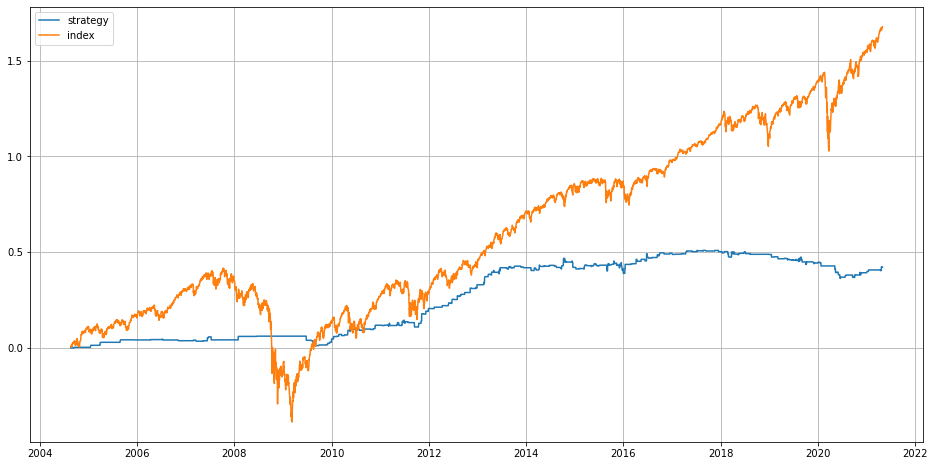

In [14]:
# devised trading strategy
# herding means market is irrational, there for index price will correct itself

df['signal'] = 0
CSSD_threshold = np.percentile(df['CSSD'],30)
print(CSSD_threshold)

for i in range(0,len(df)):
    if df['bear'][i]==1 and (df['CSSD'][i]<CSSD_threshold):
        df['signal'][i] = 1 # reverse trend and buy
    if df['bull'][i]==1 and (df['CSSD'][i]<CSSD_threshold):
        df['signal'][i] = -1 # reverse trend and sell

df['profit']=df['signal'][:-1]*(df['return_SPY'].shift(-1))
df=df[:-1]
#pd.set_option('display.max_rows', 100)
display(df)
#pd.set_option('display.max_rows', 10)

plt.figure(figsize=(16,8))
plt.plot(df['profit'].cumsum())
plt.plot(df['return_SPY'].cumsum())
plt.legend(['strategy','index'])
plt.grid()

print(f'Annualized return: {round(np.power(df["profit"].cumsum()[-1]*100,250/len(df)),2)}%')
print(f'Annualized Sharpe ratio: {round(np.power(df["profit"].mean()/df["profit"].std(),250/len(df)),2)}')
print(f'Single max drawdown: {round(df["profit"].min()*100,4)}%')
print(f'Average number of trades generated annually: {round(np.count_nonzero(df["signal"]!=0)/(len(df)/250))}')

In [15]:
# CSSD regression

m = sm.formula.ols(formula='CSSD~bull+bear',data=df)
model = m.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CSSD   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     94.73
Date:                Mon, 10 May 2021   Prob (F-statistic):           5.75e-41
Time:                        00:25:32   Log-Likelihood:                 13734.
No. Observations:                4202   AIC:                        -2.746e+04
Df Residuals:                    4199   BIC:                        -2.744e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0112      0.000     61.192      0.000       0.011       0.012
bull           0.0037      0.000     10.217      0.000       0.003       0.004
bear           0.0042      0.000     11.486      0.000       0.003       0.005
==============================================================================
Omnibus:                     2937.534   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51592.058
Skew:                           3.156   Prob(JB):                         0.00
Kurtosis:                      18.964   Cond. No.                         3.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

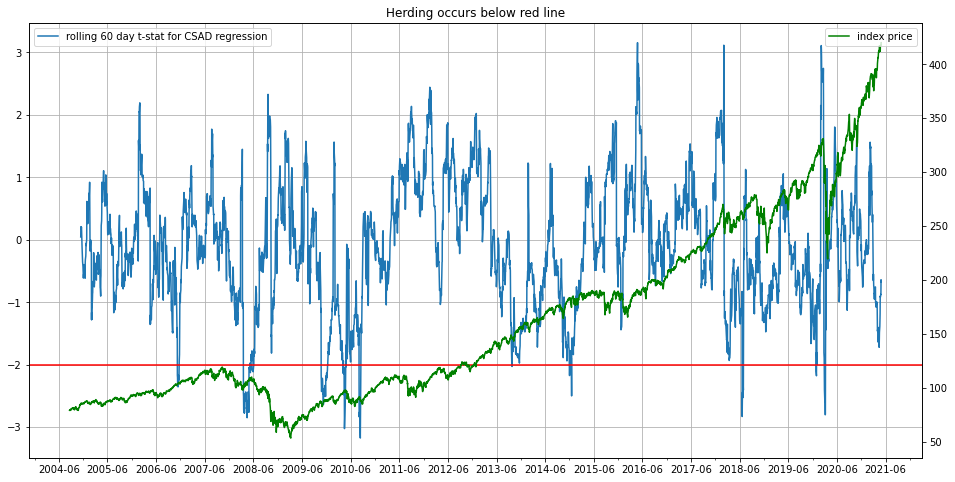

In [16]:
# CSAD regression

df['abs_return_SPY'] = abs(df['return_SPY'])
df['square_return_SPY'] = np.power(df['return_SPY'],2)

m = RollingOLS.from_formula('CSAD~return_SPY+abs_return_SPY+square_return_SPY',data=df,window=60)
model = m.fit()

#plt.figure(figsize=(16,8))
fig, ax = plt.subplots(figsize=(16,8))
plt.title('Herding occurs below red line')
plt.plot(model.tvalues['square_return_SPY'])
plt.legend(['rolling 60 day t-stat for CSAD regression'],loc='upper left')
plt.axhline(y=-2,color='red')
plt.grid()


ax2 = ax.twinx()
ax2.plot(df['SPY'],color='green')
ax2.legend(['index price'],loc='upper right')

ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
# Minor ticks every month.
fmt_month = mdates.MonthLocator(interval=6)
ax2.xaxis.set_minor_locator(fmt_month)
# Text in the x axis will be displayed in 'YYYY-mm' format.
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))